In [2]:
import pandas as pd

# read csv file
data = pd.read_csv('archive_export (1).csv')

In [3]:
# Filter data from the year 2000 to 2009
data_2000_2009 = data[(data['date'] >= 20000101) & (data['date'] <= 20091231)]

data_2000_2009.head()

,date,rank,film,country,weekend_gross,distributor,weeks_on_release,number_of_cinemas,total_gross,week_gross
11645,20000102,1,THE WORLD IS NOT ENOUGH,UNITED KINGDOM/UNITED STATES,797142.0,UNITED INTERNATIONAL PICTURES,6,0,23375037,797142.0
11646,20000102,2,INSPECTOR GADGET,NaN,561633.0,NaN,3,0,4351112,561633.0
11647,20000102,3,BLUE STREAK,NaN,402298.0,NaN,2,0,1272860,402298.0
11648,20000102,4,THE SIXTH SENSE,NaN,328540.0,NaN,9,0,20449726,328540.0
11649,20000102,5,DOGMA,NaN,283203.0,NaN,2,0,1002349,283203.0


In [4]:
# Extract the year from the 'date' column
data_2000_2009['year'] = data_2000_2009['date'].apply(lambda x: int(str(x)[:4]))

# Calculate the total box office for each year
total_box_office_per_year = data_2000_2009.groupby('year')['weekend_gross'].sum()

total_box_office_per_year

/var/folders/j2/d6gfnc_j1w92nhthf02vfpy00000gn/T/ipykernel_43564/3295355124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2000_2009['year'] = data_2000_2009['date'].apply(lambda x: int(str(x)[:4]))


year
2000    372194113.0
2001    436163776.0
2002    506509919.0
2003    493474307.0
2004    515920671.0
2005    501552845.0
2006    517915325.0
2007    556346760.0
2008    567737690.0
2009    632807605.0
Name: weekend_gross, dtype: float64

In [5]:
# Calculate the number of unique films released each year
unique_films_per_year = data_2000_2009.groupby('year')['film'].nunique()

unique_films_per_year

year
2000    187
2001    182
2002    209
2003    249
2004    295
2005    265
2006    326
2007    426
2008    514
2009    488
Name: film, dtype: int64

In [6]:
# Calculate the average box office for each year
average_box_office_per_year = data_2000_2009.groupby('year')['weekend_gross'].mean()

average_box_office_per_year

year
2000    468168.695597
2001    559184.328205
2002    543465.578326
2003    392268.924483
2004    355562.144039
2005    339575.385917
2006    323899.515322
2007    365776.962525
2008    384385.707515
2009    430481.363946
Name: weekend_gross, dtype: float64

In [7]:
# List the top 10 movies by box office from 2000 to 2009
top_10_movies = data_2000_2009.sort_values(by='total_gross', ascending=False).drop_duplicates(subset='film').head(10)

top_10_movies[['year', 'film', 'total_gross']]

,year,film,total_gross
23048,2009,MAMMA MIA!,69166814
13368,2002,HARRY POTTER AND THE PHILOSOPHER'S STONE,63957673
13411,2002,THE LORD OF THE RINGS,61618595
15743,2004,LORD OF THE RINGS: RETURN OF THE KING,60666284
14379,2003,LORD OF THE RINGS: TWO TOWERS,57062828
14496,2003,HARRY POTTER AND THE CHAMBER OF SECRETS,55889009
20300,2007,CASINO ROYALE,55502884
19528,2006,PIRATES OF THE CARIBBEAN 2,51735498
23157,2009,QUANTUM OF SOLACE,51070677
24260,2009,HARRY POTTER AND THE HALF-BLOOD PRINCE,50716396


In [8]:
# List the movies with the longest weeks on release from 2000 to 2009
longest_release_movies = data_2000_2009.sort_values(by='weeks_on_release', ascending=False).drop_duplicates(subset='film').head(10)

longest_release_movies[['year', 'film', 'weeks_on_release']]

,year,film,weeks_on_release
18349,2006,POLAR EXPRESS,57
22899,2008,IT'S A WONDERFUL LIFE (RE),54
21852,2008,LA VIE EN ROSE,42
14800,2003,THE MAGDALENE SISTERS,39
20429,2007,THE QUEEN,33
23180,2009,THE DARK KNIGHT,32
15604,2004,"GOOD BYE, LENIN!",30
21823,2008,ATONEMENT,30
15470,2004,ETRE ET AVOIR,30
23048,2009,MAMMA MIA!,29


In [18]:
# Hide the index using Styler object and display the result
display(longest_release_movies.head(200).style.hide_index())

/var/folders/j2/d6gfnc_j1w92nhthf02vfpy00000gn/T/ipykernel_43564/1596842760.py:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  display(longest_release_movies.head(200).style.hide_index())


date,rank,film,country,weekend_gross,distributor,weeks_on_release,number_of_cinemas,total_gross,week_gross,year
20060101,12,POLAR EXPRESS,nan,68863.000000,WARNER BROS,57,32,10502091,271105.000000,2006
20081221,12,IT'S A WONDERFUL LIFE (RE),UNITED STATES,49845.000000,PARK CIRCUS,54,32,248018,49845.000000,2008
20080406,47,LA VIE EN ROSE,UNITED KINGDOM/Czech Republic/France,2456.000000,ICON,42,4,1690129,4841.000000,2008
20030720,62,THE MAGDALENE SISTERS,nan,239.000000,MOMENTUM,39,1,2138010,22114.000000,2003
20070429,52,THE QUEEN,nan,1183.000000,PATHE,33,2,9419854,5453.000000,2007
20090301,32,THE DARK KNIGHT,UNITED STATES/UNITED KINGDOM,17153.000000,WARNER BROS,32,9,48871533,47141.000000,2009
20040215,60,"GOOD BYE, LENIN!",nan,20.000000,UGC FILMS,30,1,1150911,3150.000000,2004
20080330,53,ATONEMENT,UNITED KINGDOM,1720.000000,UNIVERSAL,30,2,12003259,4655.000000,2008
20040111,62,ETRE ET AVOIR,nan,20.000000,TARTAN,30,1,706152,20.000000,2004
20090125,52,MAMMA MIA!,UNITED STATES/UNITED KINGDOM,601.000000,UNIVERSAL,29,4,69166814,727.000000,2009


In [10]:
# Filter data for movies released between 2000 and 2009
filtered_data_2000_2009 = data[(data['date'] >= 20000101) & (data['date'] <= 20091231)]

# 1. Count the number of movies released by each distributor
movies_per_distributor = filtered_data_2000_2009.groupby('distributor')['film'].nunique().sort_values(ascending=False)

# 2. Calculate the total gross for each distributor
total_gross_per_distributor = filtered_data_2000_2009.groupby('distributor')['total_gross'].sum().sort_values(ascending=False)

# 3. Combine the results for easy viewing
combined_analysis = pd.DataFrame({
    'Number of Movies': movies_per_distributor,
    'Total Gross': total_gross_per_distributor
})

combined_analysis.head(200)  # Display top 10 for brevity

,Number of Movies,Total Gross
distributor,,
104 FILMS,1,231
1A FILMS,1,16689
20TH CENTURY FOX,188,6378849875
21ST CENTURY,1,48913
4TH DIGITAL,1,1367
...,...,...
YASHRAJ,1,67389
YEH YEH YEH,1,11376
YUME PICTURES,6,193714


In [11]:
# 1. Sort distributors by the number of movies released
sorted_by_movies = combined_analysis.sort_values(by='Number of Movies', ascending=False)
sorted_by_movies.head(200)

,Number of Movies,Total Gross
distributor,,
20TH CENTURY FOX,188,6378849875
UNITED INTERNATIONAL PICTURES,173,8061460520
WARNER BROS,162,10713903319
ENTERTAINMENT,157,5494857766
BVI,151,5553044188
...,...,...
FERNDALE,1,21007
PATHE DISTRIBUTION,1,358509755
GALA,1,66826


In [12]:
# 2. Sort distributors by total gross
sorted_by_gross = combined_analysis.sort_values(by='Total Gross', ascending=False)
sorted_by_gross.head(200)

,Number of Movies,Total Gross
distributor,,
WARNER BROS,162,10713903319
UNITED INTERNATIONAL PICTURES,173,8061460520
20TH CENTURY FOX,188,6378849875
BVI,151,5553044188
ENTERTAINMENT,157,5494857766
...,...,...
MERCURY,1,423
DOGWOOF/POLISH CONNECTION,1,332
PARASOL PICTURES,1,283


In [13]:
# Correlation analysis between numerical variables and 'total_gross'
correlation_matrix = filtered_data_2000_2009[['weeks_on_release', 'number_of_cinemas', 'week_gross', 'total_gross']].corr()

# Extracting correlation values with 'total_gross'
correlation_with_total_gross = correlation_matrix['total_gross'].drop('total_gross')
correlation_with_total_gross

weeks_on_release     0.290102
number_of_cinemas    0.319356
week_gross           0.287535
Name: total_gross, dtype: float64

Based on the data from 2000 to 2009, the following are variables correlated with "total box office":

Weeks on Release (weeks_on_release): Correlation coefficient of 0.29
Number of Cinemas (number_of_cinemas): Correlation coefficient of 0.32
Weekly Box Office (week_gross): Correlation coefficient of 0.29
These correlation values indicate a moderate strength positive correlation. This means:

Movies with a longer duration of release tend to have a higher total box office.
Movies screened in more cinemas tend to achieve a higher total box office.
Movies with a higher weekly box office tend to accumulate a higher overall box office throughout their release period.

In [15]:
# Grouping by distributor and calculating the average total gross for each distributor
average_gross_by_distributor = filtered_data_2000_2009.groupby('distributor')['total_gross'].mean().sort_values(ascending=False)

# Displaying the top 10 distributors based on average total gross
average_gross_by_distributor.head(200)

distributor
PATHE DISTRIBUTION           2.240686e+07
WARNER BROS                  1.306574e+07
UNIVERSAL                    9.758447e+06
PARAMOUNT                    8.678946e+06
SONY PICTURES                8.490564e+06
                                 ...     
MANGA                        3.783333e+02
DOGWOOF/POLISH CONNECTION    3.320000e+02
PARASOL PICTURES             2.830000e+02
104 FILMS                    2.310000e+02
SHORELINE                    1.860000e+02
Name: total_gross, Length: 176, dtype: float64

/var/folders/j2/d6gfnc_j1w92nhthf02vfpy00000gn/T/ipykernel_43564/1759166994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2000_2009['date'] = pd.to_datetime(filtered_data_2000_2009['date'], format='%Y%m%d')


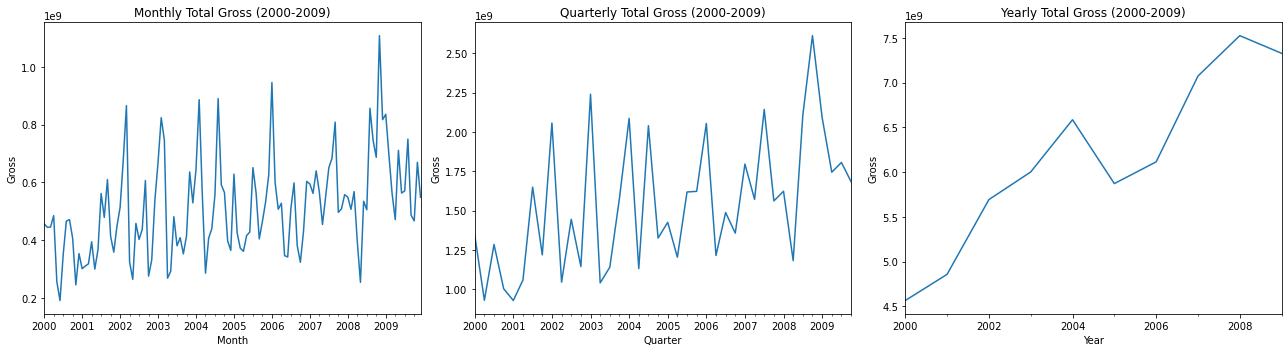

In [16]:
# Convert the 'date' column to a proper datetime format
filtered_data_2000_2009['date'] = pd.to_datetime(filtered_data_2000_2009['date'], format='%Y%m%d')

# Group data by month, quarter, and year
monthly_gross = filtered_data_2000_2009.groupby(filtered_data_2000_2009['date'].dt.to_period("M"))['total_gross'].sum()
quarterly_gross = filtered_data_2000_2009.groupby(filtered_data_2000_2009['date'].dt.to_period("Q"))['total_gross'].sum()
yearly_gross = filtered_data_2000_2009.groupby(filtered_data_2000_2009['date'].dt.to_period("Y"))['total_gross'].sum()

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

# Monthly gross
plt.subplot(1, 3, 1)
monthly_gross.plot()
plt.title('Monthly Total Gross (2000-2009)')
plt.ylabel('Gross')
plt.xlabel('Month')

# Quarterly gross
plt.subplot(1, 3, 2)
quarterly_gross.plot()
plt.title('Quarterly Total Gross (2000-2009)')
plt.ylabel('Gross')
plt.xlabel('Quarter')

# Yearly gross
plt.subplot(1, 3, 3)
yearly_gross.plot()
plt.title('Yearly Total Gross (2000-2009)')
plt.ylabel('Gross')
plt.xlabel('Year')

plt.tight_layout()
plt.show()

The chart shows the box office trend from 2000 to 2009.

Monthly Total Box Office: The box office each month exhibits certain seasonal fluctuations. Some months, such as summer and winter, seem to have higher box office revenues than others.
Quarterly Total Box Office: The quarterly box office also demonstrates a seasonal trend, with the second and fourth quarters often having higher revenues.
Yearly Total Box Office: From 2000 to 2009, the movie box office showed an upward trend, especially in 2008 and 2009, where there was a significant increase.

In [17]:
import statsmodels.api as sm

# Prepare the data for regression analysis
X = filtered_data_2000_2009[['weeks_on_release', 'number_of_cinemas', 'week_gross']]
X = sm.add_constant(X)  # Add a constant term to the predictor
y = filtered_data_2000_2009['total_gross']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression
regression_summary = model.summary()
regression_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            total_gross   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     1654.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:39:46   Log-Likelihood:            -2.2064e+05
No. Observations:               12760   AIC:                         4.413e+05
Df Residuals:                   12756   BIC:                         4.413e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.651e+06   1.31e+05    -20.194      0.000   -2.91e+06   -2.39e+06
weeks_on_release   7.873e+05   1.47e+04     53.687      0.000    7.59e+05    8.16e+05
number_of_cinemas  1.897e+04    541.926     35.002      0.000    1.79e+04       2e+04
week_gross            1.2130      0.062     19.654      0.000       1.092       1.334
==============================================================================
Omnibus:                     8061.007   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101919.922
Skew:                           2.886   Prob(JB):                         0.00
Kurtosis:                      15.585   Cond. No.                     2.87e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R-squared: The R-squared value of this model is 0.280, which means the model explains 28% of the variance in the total box office.
Coefficients:

const (Constant Term): -2,651,000
weeks_on_release (Weeks on Release): 787,300, implying that with each additional week of release, the expected total box office will increase by approximately 787,300.

number_of_cinemas (Number of Cinemas): 18,970, implying that with each additional cinema, the expected total box office will increase by approximately 18,970.

week_gross (Weekly Box Office): 1.213, implying that with each additional unit increase in the weekly box office, the expected total box office will increase by 1.213.

All the predictor variables are significant (P < 0.05), indicating they are important for predicting the total box office.

